In [14]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [15]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 100,
    'n_epoch': 40,
    'lr': 0.001,
    'verbose': True,
    'eval_freq': 100,
    'batch_size': 64,
    'split': 0.8,
    'log': False,
    'action_dim': 1,
    'layers': [5,5,5]
}

policy_cfg = {
    'timesteps': 3000,
    'verbose': False,
    'algo': 'ppo', # not used atm
    'log': False,
    'action_dim': 1
}

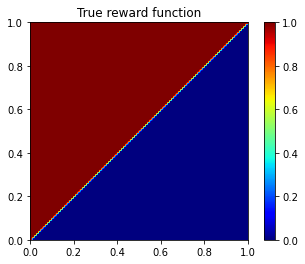

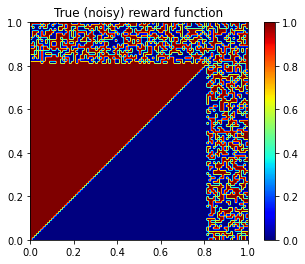

In [16]:
## Setup

iterations = 10

# Create comparison function
f = lambda x: x[0]
var_1, var_2 = 0.0, 10.0
reward_fn_true = lambda x : f(x)
seed = None
np.random.seed(seed)
noise_fn = lambda x: step_noise(x[0], x_step=0.8, var_1=var_1, var_2=var_2, seed=seed)
reward_fn_true_noisy = create_reward_fn_1(f, noise_fn, seed=seed)
comparison_fn = create_comparison_fn_1(f, noise_fn, seed=seed)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(0, 1, size=(1,)) for _ in range(n)])

# Plot true reward function
vis_fn = lambda fn, title: visualize_fn_1(fn, title=title, x_range=[0,1], x_step=0.01)
vis_fn(reward_fn_true, title="True reward function")
vis_fn(reward_fn_true_noisy, title="True (noisy) reward function")

In [17]:
## Run feedback loop

comparisons_data = None
samples = {}
reward_fns = {}

for i in range(iterations):
    print(f"Iteration {i}", end=",")
    # Learn reward function from samples and feedback from comparison function
    reward_fn, comparisons_data = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg, prev_comparisons=comparisons_data)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store sampler and reward function
    samples[i] = sample
    reward_fns[i] = reward_fn

    # plot_sampler_1(samples[i], title=str(i), n=1000)
    # vis_fn(reward_fns[i], title=str(i))

Iteration 0,Learning with Cross Entropy
Starting epoch 1
Epoch 1 [100/127]	Train Loss: 0.6864 	Val Loss: 0.6783
Starting epoch 2
Epoch 2 [100/127]	Train Loss: 0.8476 	Val Loss: 0.6528
Starting epoch 3
Epoch 3 [100/127]	Train Loss: 0.8193 	Val Loss: 0.6360
Starting epoch 4
Epoch 4 [100/127]	Train Loss: 0.8094 	Val Loss: 0.6302
Starting epoch 5
Epoch 5 [100/127]	Train Loss: 0.7987 	Val Loss: 0.6281
Starting epoch 6
Epoch 6 [100/127]	Train Loss: 0.8002 	Val Loss: 0.6264
Starting epoch 7
Epoch 7 [100/127]	Train Loss: 0.7993 	Val Loss: 0.6274
Starting epoch 8
Epoch 8 [100/127]	Train Loss: 0.7980 	Val Loss: 0.6237
Starting epoch 9
Epoch 9 [100/127]	Train Loss: 0.7941 	Val Loss: 0.6198
Starting epoch 10
Epoch 10 [100/127]	Train Loss: 0.7927 	Val Loss: 0.6219
Starting epoch 11
Epoch 11 [100/127]	Train Loss: 0.7923 	Val Loss: 0.6196
Starting epoch 12
Epoch 12 [100/127]	Train Loss: 0.7898 	Val Loss: 0.6189
Starting epoch 13
Epoch 13 [100/127]	Train Loss: 0.7927 	Val Loss: 0.6208
Starting epoch 1

In [18]:
# vis_fn(reward_fns[0], title="Learnt reward function")
# plot_fn_1(reward_fns[0], title="Learnt reward function", x_range=[0,1], x_step=0.01)

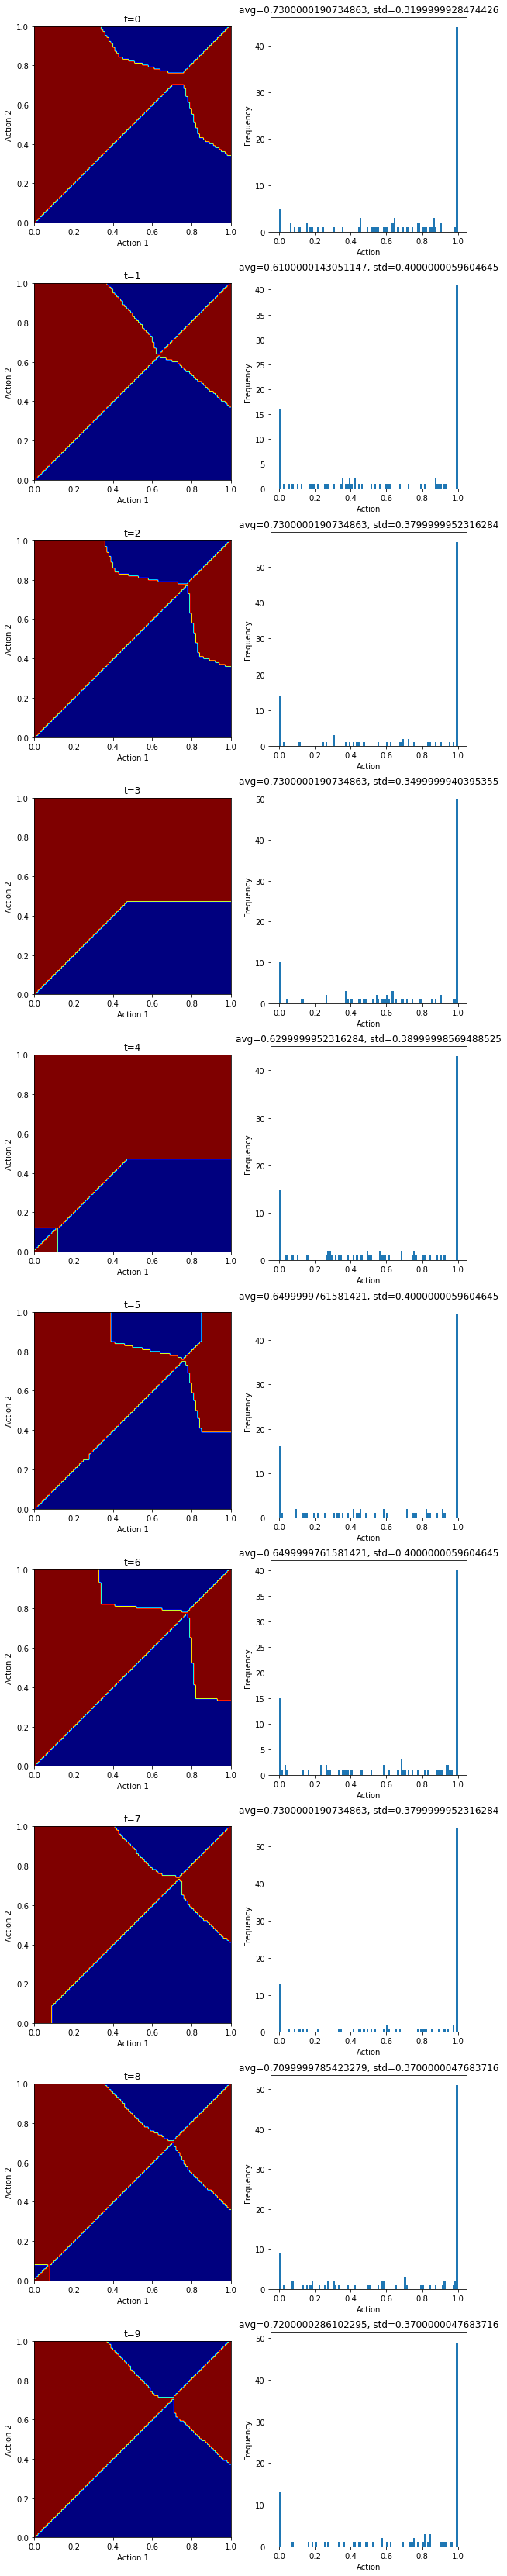

<Figure size 432x288 with 0 Axes>

In [19]:
# Visualize results

visualize_res_1(reward_fns, samples, figsize=(10,6*iterations), save="1d_res", round=2)